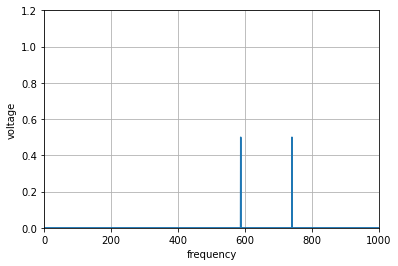

In [4]:
#!/usr/bin/env python3

import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
from IPython.display import Audio
import scipy.io.wavfile

# Generate and plot sine wave

fs = 48000  # sample rate
Ts = 1/fs  # time step
Tmax =  2 # total simulation time
t = np.arange(0, Tmax, Ts)  # time vector start / end / step

def make_wave(note, t):
    fbase = 440 
    notes = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]
    tone_frequencies = {note: fbase * 2**(i/ 12) for i, note in enumerate(notes)}
    return np.cos(2 * np.pi * t * round(tone_frequencies[note]))

# test1: 587.   740.
ub = make_wave("D", t)  + make_wave("F#", t)

# test2: 659.   831.
# ub = make_wave("E", t)  + make_wave("G#", t)

# test3: 440 787 
# ub = make_wave("A", t)  + make_wave("G", t)

# test4: 440 454
# ub = make_wave("A", t)  + make_wave("C#", t)

ub = ub / 2


# ub = A * np.cos(2 * np.pi * fb * t)

# Calculate Frequency Spectrum
# with Fast Fourier Transformation (FFT)
F = np.fft.fft(ub)  # fourier coefficient (= amplitude) at each frequency
n = len(ub)  # number of samples
f = np.arange(0, n)*(fs/n)  # vector of frequencies
volt = 2/n * np.abs(F)  # absolute value of amplitude

# calculate peaks in spectrum
peakfreq, _ = sp.find_peaks(volt, height=1e-2)
# print(peakfreq*fs/n) # scale frequencies
# print(volt[peakfreq]) # amplitudes

# Plot Frequency Domain (Frequenzbereichsdarstellung)

plt.plot(f, volt)
plt.grid(True)
plt.axis([0, 1000, 0, 1.2])
plt.xlabel('frequency')
plt.ylabel('voltage')

plt.show()
pcm = (ub *(2 ** 15 - 1)).astype(np.int16)
# scipy.io.wavfile.write("test1.wav", fs, pcm)
Audio(data=ub, rate=fs)
